# Exercise:

## Aim:

1. Plot a scale bar
1. Add a genes track for hg38
1. Add a bed file with peaks for CUT&TAG data
1. Add a bigwig for the CUT&TAG data
1. Add a bigwig for RNA data (-ve and +ve strand) as an overlay

### Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotnado.api as pn
from plotnado.api import TrackWrapper

## Define the BigWig files that we want to plot:

**Note**: Add all of these files to the figure

### Bed file

Bed files for merged replicates are here:
/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/peaks/merged/lanceotron

### CUT&TAG data

The SeqNado output is here: 
/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output

The BigWig files to use are here:
/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/bigwigs/deeptools/spikein


### RNA data

The bigwig files are here:
/ceph/project/milne_group/asmith/RNA-seq/2024-07-25-POINT-seq/2024-07-25_rna_point-seq/seqnado_output/bigwigs/deeptools/unscaled

# Collecting the data

It's very tedious to collect all the data manually. We can use the `glob` method from the pathlib library to collect all the files in a directory. 

```python
from pathlib import Path

# Define the path to the directory
cat_bw = Path('/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/bigwigs/deeptools/spikein')

# Use the glob method to collect all the files.
cat_files = list(cat_bw.glob('*.bigWig'))

```

A couple of points here: 

1. The * is a wildcard that will match any file.
1. The glob method returns a generator (don't worry about this for now) so we convert it to a list.

## Bed files

**Note**: This will contain some unwanted files. You can carry on with the plotting or these can be filtered:

Python offers multiple ways to filter a list of files. Here is one way to do it referred to as list comprehension:

```python
# Define the path to the directory
cat_bed = Path('/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/peaks/merged/lanceotron')

# Use the glob method to collect all the files.
cat_bed_files = list(cat_bed.glob('*.bed'))

# Filter the files
cat_bed_files = [file for file in cat_bed_files if 'merged' in file.name] # file.name uses the `name` attribute of the Path object
```

### Collect Bed files

In [2]:
peaks = Path('/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/peaks/merged/lanceotron')
peaks = list(peaks.glob('*.bed'))
peaks = [p for p in peaks if not 'L-tron' in p.name]

## CAT Bigwigs

In [3]:
cat_bw = Path('/ceph/project/milne_group/cchahrou/project/2024-10-15_cat_cell/seqnado_output/bigwigs/deeptools/spikein')
cat_bw = list(cat_bw.glob('*.bigWig'))

## RNA Bigwigs

In [4]:
rna_bw = Path('/ceph/project/milne_group/asmith/RNA-seq/2024-07-25-POINT-seq/2024-07-25_rna_point-seq/seqnado_output/bigwigs/deeptools/unscaled')
rna_bw = list(rna_bw.glob('*.bigWig'))

# Plotting the data

## Create a figure

In [5]:
figure = pn.Figure(autocolor=True, autospacing=True) # Create a figure instance, autocolor and autospacing are optional arguments but make the figure look nicer

## Add the scale bar and genes track

In [6]:
figure.add_track('scale') # Add a scale track
figure.add_track('genes', 
                 file='/project/milne_group/shared/seqnado_reference/hg38/hg38_genes.bed', 
                 gene_style="normal",
                 min_gene_length=int(1.2e5),
                 height=0.5,
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")

## Add the bed files

In [7]:
for fn in peaks:
    figure.add_track('bed_simple', file=str(fn), name=fn.name) # Note the use of str() to convert the Path object to a string

## Add the bigwigs

In [8]:
for fn in cat_bw:
    figure.add_track('bigwig', # Track type 
                     file=str(fn), # File or URL to the bigwig file 
                     )


for fn in rna_bw:
    figure.add_track('bigwig', # Track type 
                     file=str(fn), # File or URL to the bigwig file 
                     )

## Add X-axis track

In [9]:
figure.add_track('xaxis') # Add an x-axis track

# Plot figure

2025-01-27 16:10:38.708 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3328.83395599834 bp
2025-01-27 16:10:38.729 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


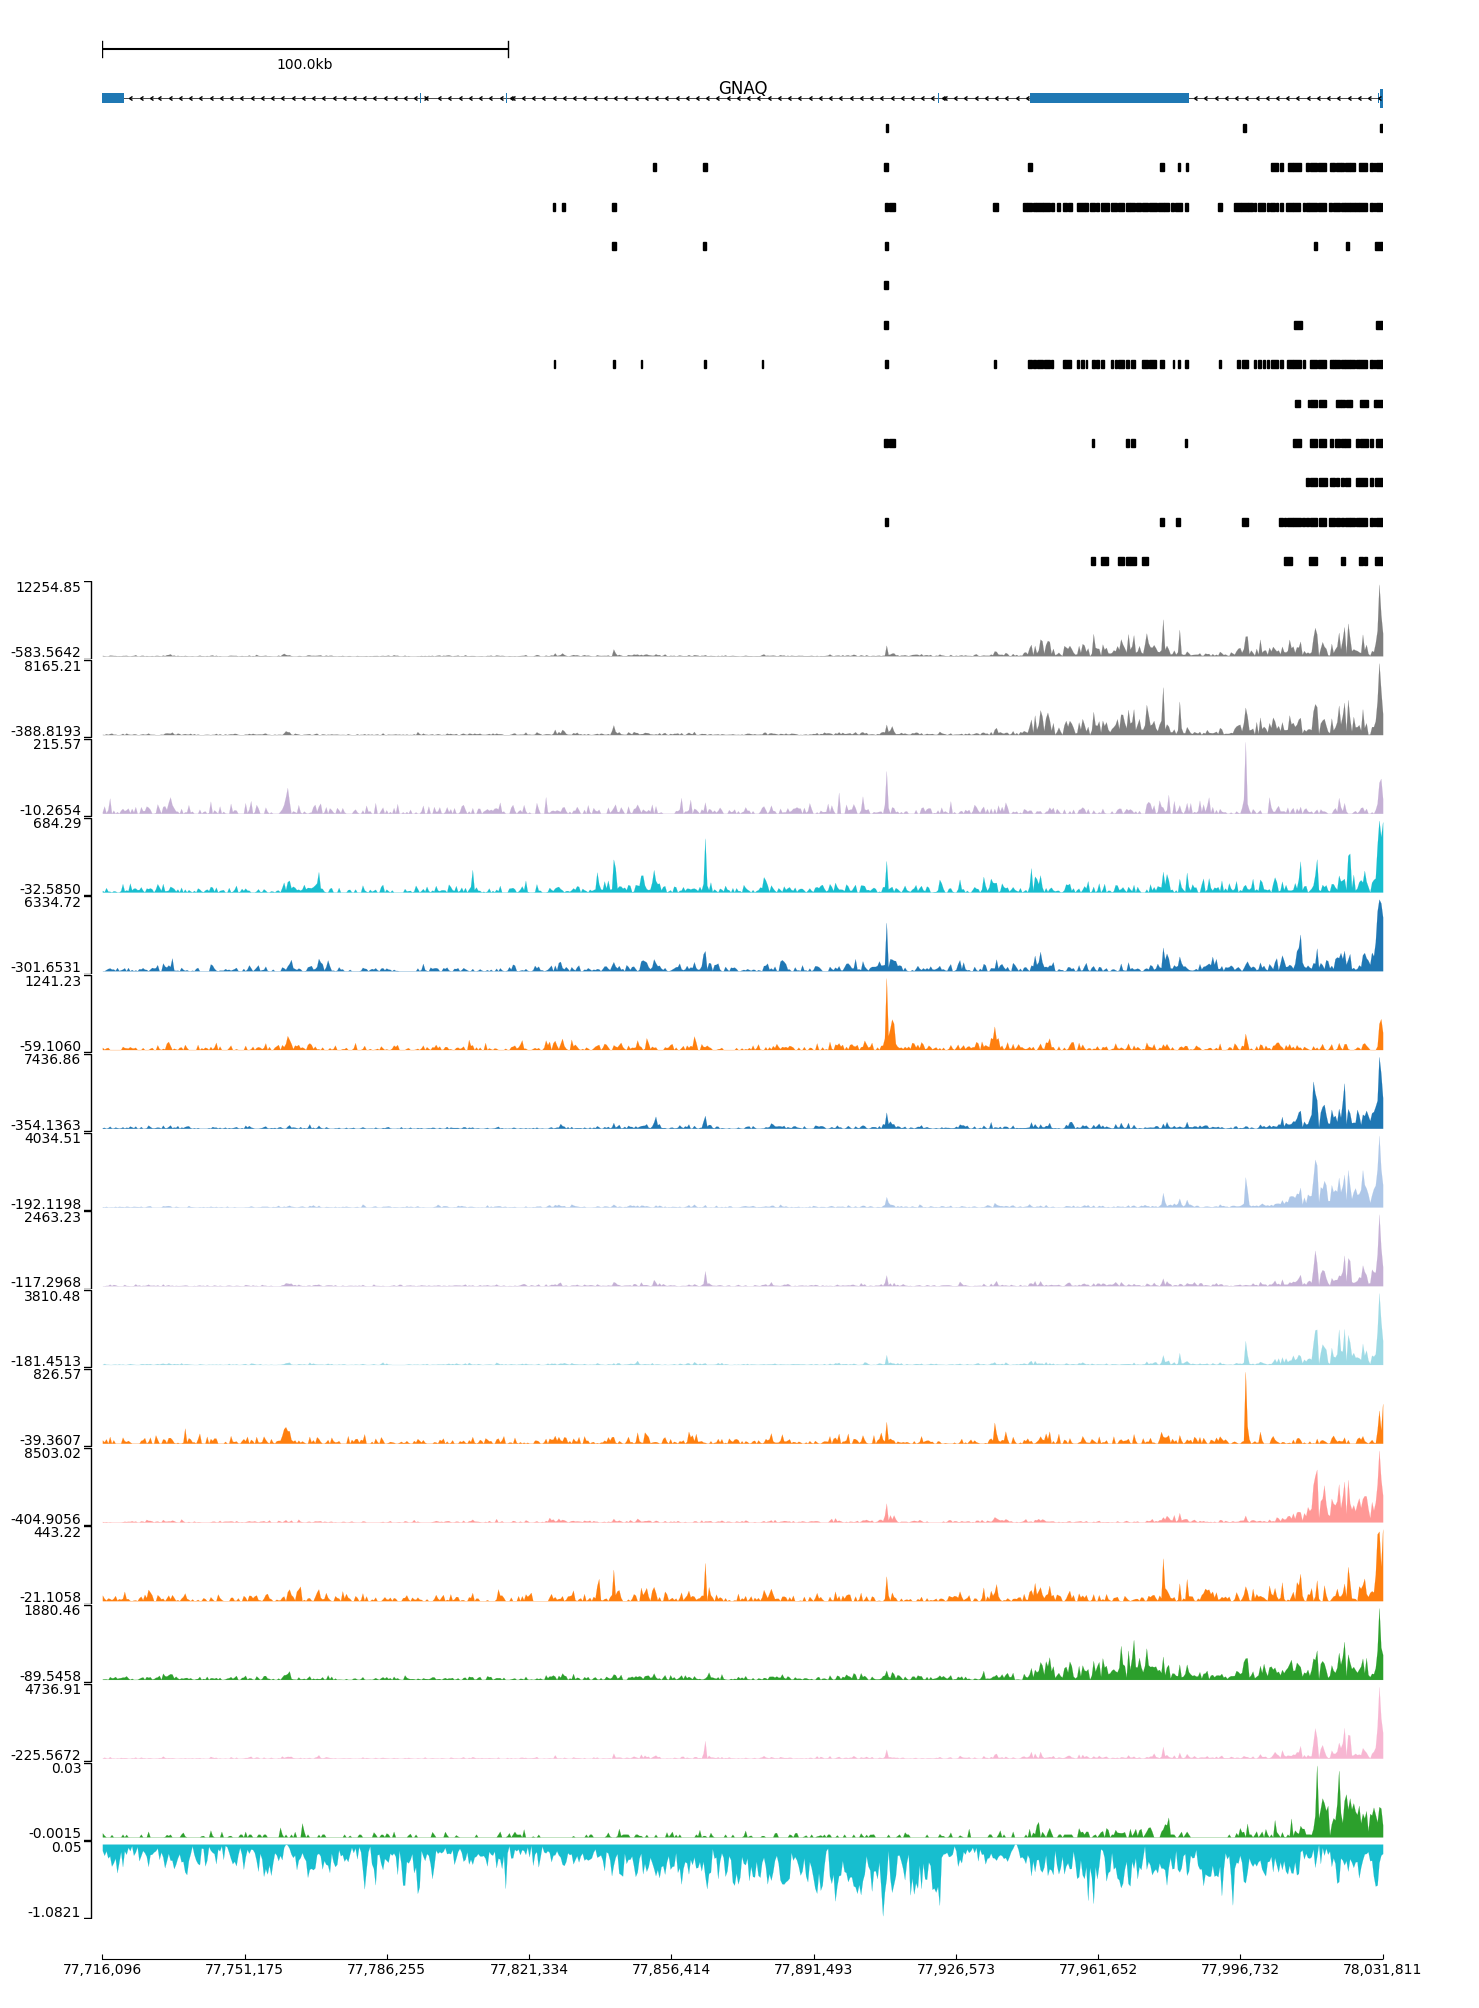

In [10]:
figure.plot('chr9:77716096-78031811', upstream=5000, downstream=5000) # Plot the figure, specifying the region to plot

# Lets see what we can improve:

1. Put the tracks into some kind of order
1. Give everything a name
1. Specify some colors
1. Change the style
1. Autoscale the tracks

In [23]:
figure = pn.Figure(autocolor=False, autospacing=True) # Create a figure instance, autocolor and autospacing are optional arguments but make the figure look nicer
figure.add_track('scale') # Add a scale track
figure.add_track('genes', 
                 file='/project/milne_group/shared/seqnado_reference/hg38/hg38_genes.bed', 
                 gene_style="normal",
                 min_gene_length=int(1.2e5),
                 height=0.5,
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")



colours = {
    'mv411': 'red',
    'sem': 'blue',
    'rs411': 'green',
    'rch': 'purple'
}


def get_color(path):
    fn = path.name.lower() # Get the filename and convert it to lowercase
    # Loop over the keys in the colours dictionary
    for key in colours.keys():
        # If the key is in the filename, return the value from the colours dictionary
        if key in fn:
            return colours[key]
    # If no key is found in the filename, return black
    return 'black'


def get_ip(path):
    fn = path.name.lower()
    if 'mll' in fn:
        return 'mll'
    if 'h3k27ac' in fn:
        return 'h3k27ac'


peaks = sorted(peaks)
cat_bw = sorted(cat_bw)

for fn in peaks:
    color = get_color(fn)
    figure.add_track('bed_simple', file=str(fn), name=fn.name, color=color, title=fn.name)

for fn in cat_bw:
    color = get_color(fn)
    autoscale_group = get_ip(fn)
    figure.add_track('bigwig', # Track type 
                     file=str(fn), # File or URL to the bigwig file 
                     color=color,
                     title=fn.name,
                     style='stairsfilled',
                     autoscale_group=autoscale_group
                     )



for track in rna_bw:
    if '_plus' in track.name:
        color = 'red'
    else:
        color = 'blue'

    figure.add_track('bigwig', # Track type
                        file=str(track), # File or URL to the bigwig file
                        color=color,
                        title=track.name,
                        style='stairsfilled',
                        autoscale_group='rna'
                        )

figure.add_track('xaxis') # Add an x-axis track

2025-01-27 16:16:16.110 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3434.2718970527194 bp
2025-01-27 16:16:16.132 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


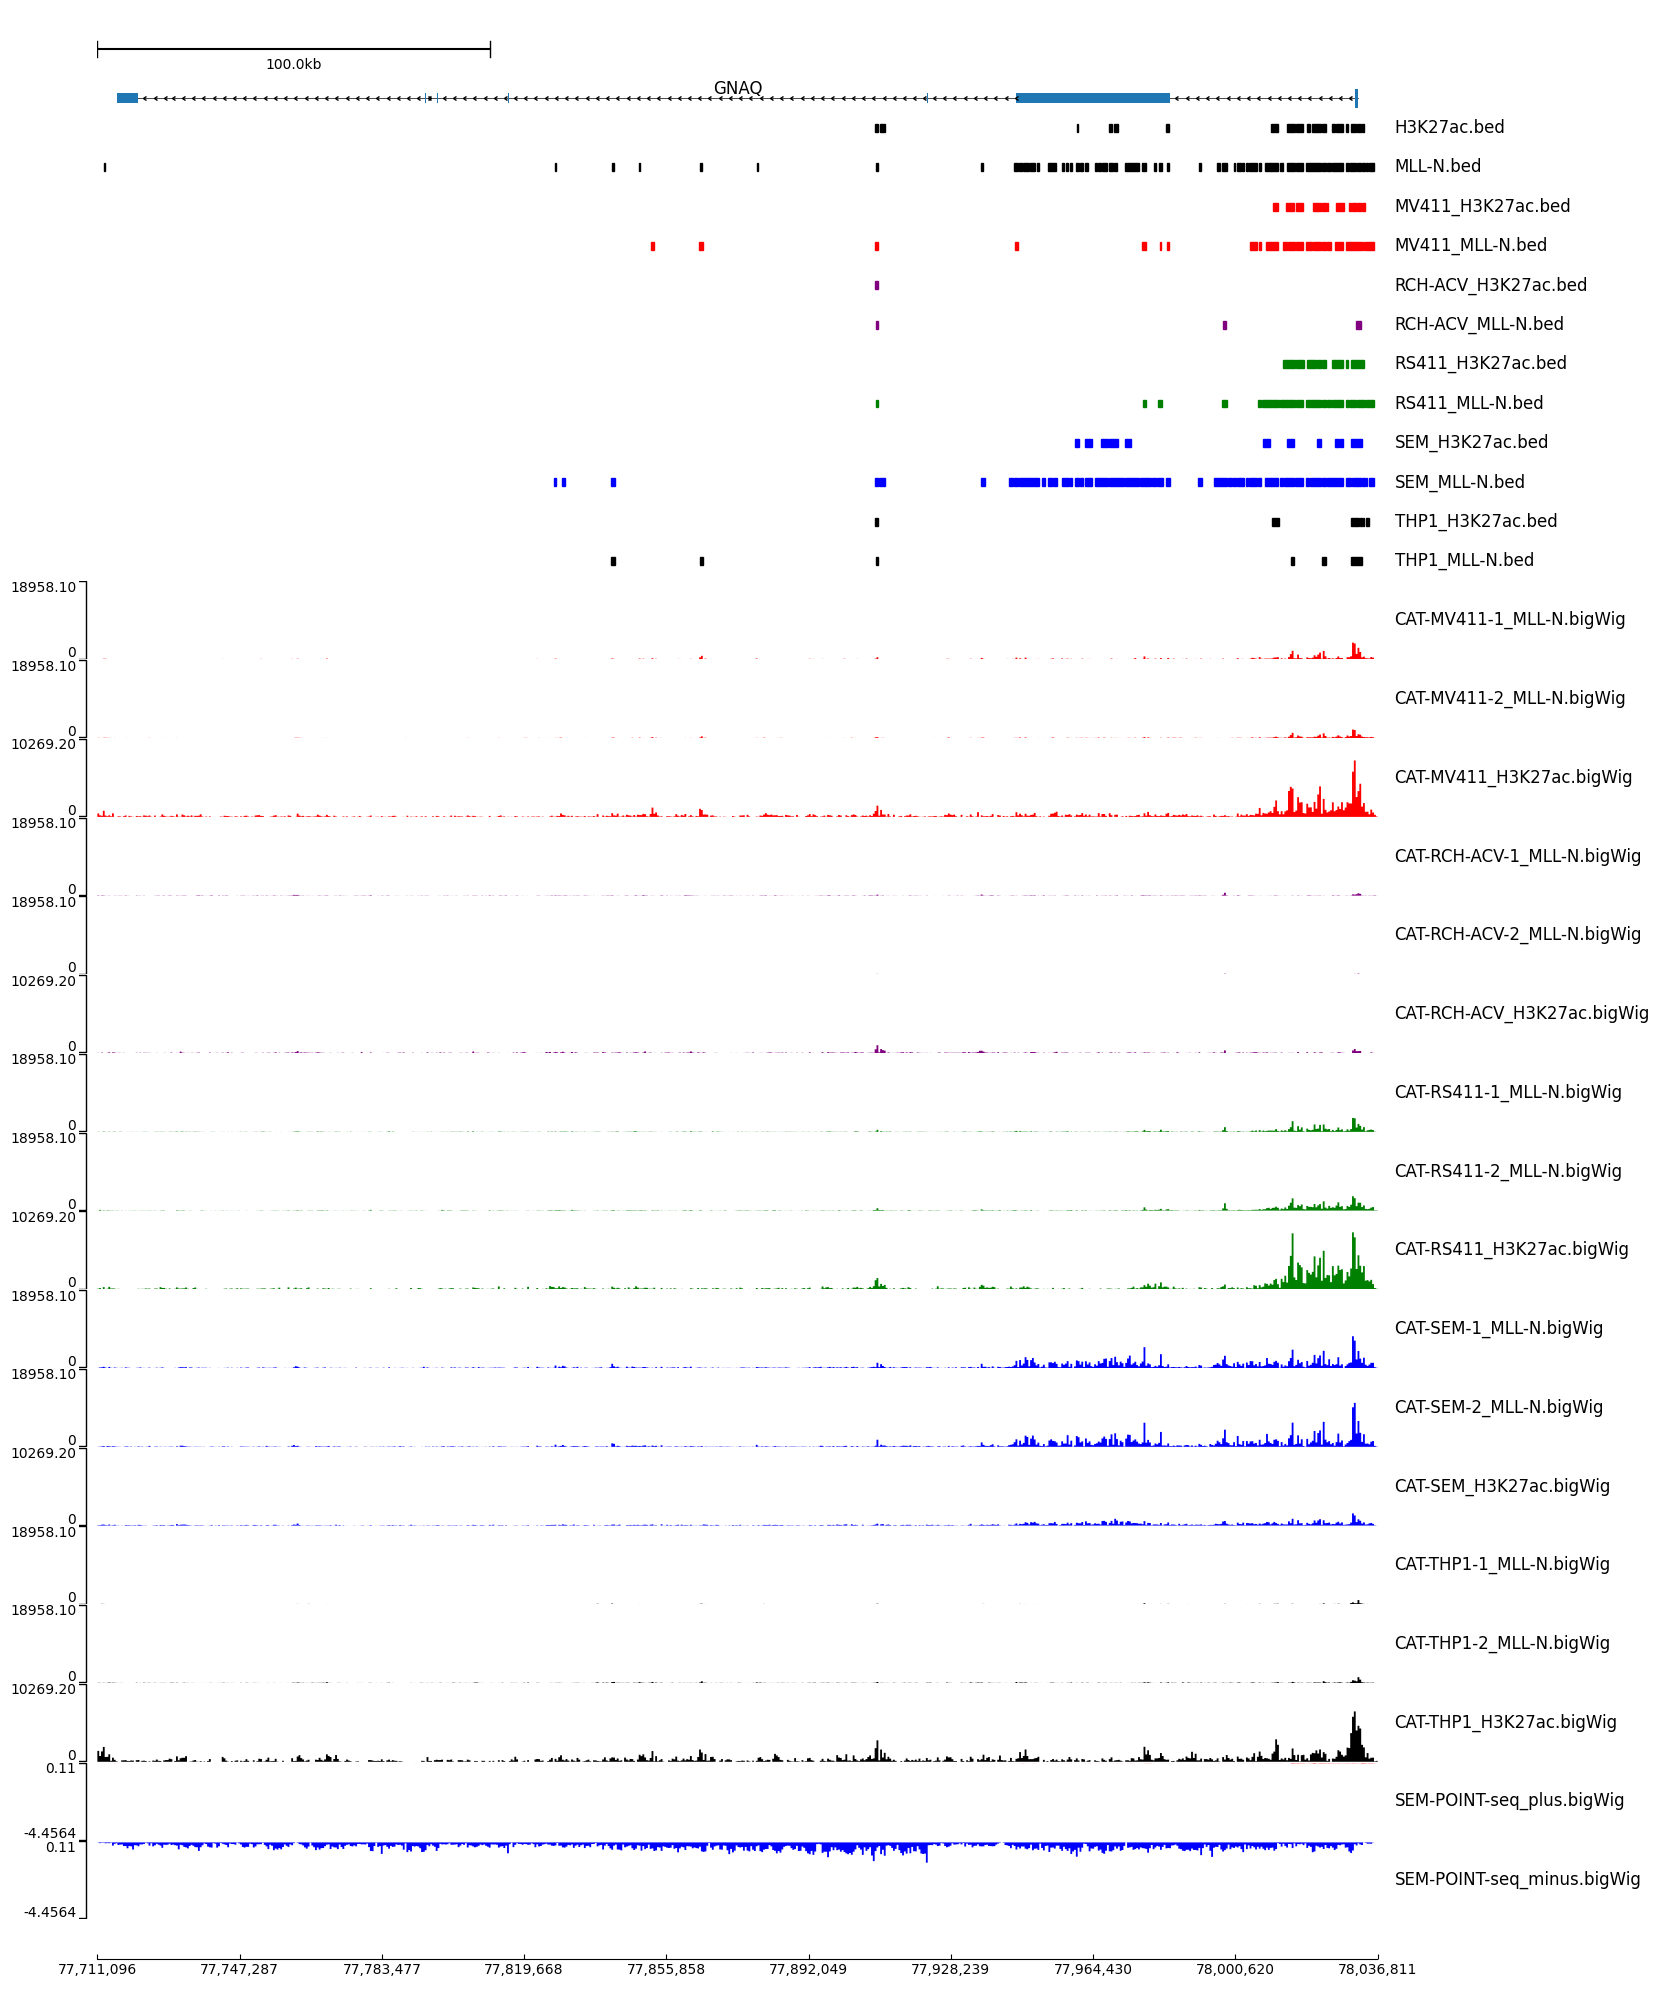

In [24]:
figure.plot_gene("GNAQ", "hg38", extend=5000)

# Extension 

1. Plot extra genes
1. Add addional tracks - ideally one of your own data
1. Change some of the track colors
1. Change some of the track styles